# Clustering in Real World
>  Now that you are familiar with two of the most popular clustering techniques, this chapter helps you apply this knowledge to real-world problems. The chapter first discusses the process of finding dominant colors in an image, before moving on to the problem discussed in the introduction - clustering of news articles. The chapter concludes with a discussion on clustering with multiple variables, which makes it difficult to visualize all the data.

- toc: true 
- badges: true
- comments: true
- author: Lucas Nunes
- categories: [Datacamp]
- image: images/datacamp/___

> Note: This is a summary of the course's chapter 4 exercises "Cluster Analysis in Python" at datacamp. <br>[Github repo](https://github.com/lnunesAI/Datacamp/) / [Course link](https://www.datacamp.com/tracks/machine-learning-scientist-with-python)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 8)

## Dominant colors in images

### Extract RGB values from image

<div class=""><p>There are broadly three steps to find the dominant colors in an image:</p>
<ul>
<li>Extract RGB values into three lists.</li>
<li>Perform k-means clustering on scaled RGB values.</li>
<li>Display the colors of cluster centers.</li>
</ul>
<p>To extract RGB values, we use the <code>imread()</code> function of the <code>image</code> class of <code>matplotlib</code>. Empty lists, <code>r</code>, <code>g</code> and <code>b</code> have been initialized.</p>
<p>For the purpose of finding dominant colors, we will be using the following image.</p>
<p><img src="https://assets.datacamp.com/production/repositories/3842/datasets/57d0d6d409bfd543e86c7f7398239fa0722e9b48/batman.jpg" alt=""></p></div>

In [2]:
!wget https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/06-cluster-analysis-in-python/figures/batman.jpg

--2021-02-08 00:57:01--  https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/06-cluster-analysis-in-python/figures/batman.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14550 (14K) [image/jpeg]
Saving to: ‘batman.jpg’

batman.jpg          100%[===================>]  14.21K  --.-KB/s    in 0s      

2021-02-08 00:57:01 (47.6 MB/s) - ‘batman.jpg’ saved [14550/14550]



In [15]:
import matplotlib.image as img
r,g,b = [],[],[]

Instructions
<ul>
<li>Import <code>image</code> class of <code>matplotlib</code>.</li>
<li>Read the image using the <code>imread()</code> function and print the dimensions of the resultant matrix.</li>
<li>Store the values for the three colors from all pixels in lists <code>r</code>, <code>g</code> and <code>b</code>.</li>
</ul>

In [16]:
# Import image class of matplotlib
import matplotlib.image as img

# Read batman image and print dimensions
batman_image = img.imread('/content/batman.jpg')
print(batman_image.shape)

# Store RGB values of all pixels in lists r, g and b
for pixel in batman_image:
    for temp_r, temp_g, temp_b in pixel:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

(57, 90, 3)


**You have successfully extracted the RGB values of the image into three lists, one for each color channel.**

### How many dominant colors?

<div class=""><p>We have loaded the following image using the <code>imread()</code> function of the <code>image</code> class of <code>matplotlib</code>.</p>
<p><img src="https://assets.datacamp.com/production/repositories/3842/datasets/57d0d6d409bfd543e86c7f7398239fa0722e9b48/batman.jpg" alt=""></p>
<p>The RGB values are stored in a data frame, <code>batman_df</code>. The RGB values have been standardized used the <code>whiten()</code> function, stored in columns, <code>scaled_red</code>, <code>scaled_blue</code> and <code>scaled_green</code>.</p>
<p>Construct an elbow plot with the data frame. How many dominant colors are present?</p></div>

In [21]:
from scipy.cluster.vq import kmeans
from scipy.cluster.vq import whiten
batman_df = pd.DataFrame({'red':r, 'blue':b, 'green':g})
batman_df['scaled_red'] = whiten(batman_df['red'])
batman_df['scaled_blue'] = whiten(batman_df['blue'])
batman_df['scaled_green'] = whiten(batman_df['green'])

Instructions
<ul>
<li>Create a list of distortions based on each value in <code>num_clusters</code> by running the <code>kmeans()</code> function.</li>
<li>Create a data frame <code>elbow_plot</code> with the lists: <code>num_clusters</code> and <code>distortions</code>.</li>
<li>Plot the data with <code>seaborn</code>'s <code>.lineplot()</code> method with <code>num_clusters</code> on the x-axis and <code>distortions</code> on the y-axis.</li>
</ul>

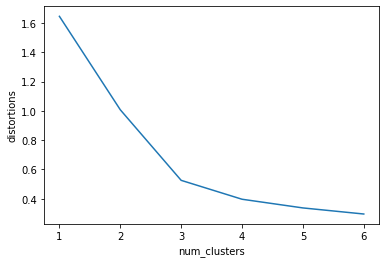

In [22]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(batman_df[['scaled_red', 'scaled_blue', 'scaled_green']], i)
    distortions.append(distortion)

# Create a data frame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

**Notice that there are three distinct colors present in the image, which is supported by the elbow plot.**

### Display dominant colors

<div class=""><p>We have loaded the following image using the <code>imread()</code> function of the <code>image</code> class of <code>matplotlib</code>.</p>
<p><img src="https://assets.datacamp.com/production/repositories/3842/datasets/57d0d6d409bfd543e86c7f7398239fa0722e9b48/batman.jpg" alt=""></p>
<p>To display the dominant colors, convert the colors of the cluster centers to their raw values and then converted them to the range of 0-1, using the following formula:
<code>converted_pixel = standardized_pixel * pixel_std / 255</code></p>
<p>The RGB values are stored in a data frame, <code>batman_df</code>. The scaled RGB values are stored in columns, <code>scaled_red</code>, <code>scaled_blue</code> and <code>scaled_green</code>. The cluster centers are stored in the variable <code>cluster_centers</code>, which were generated using the <code>kmeans()</code> function with three clusters.</p></div>

In [28]:
colors = []

Instructions
<ul>
<li>Get standard deviations of each color from the data frame and store it in <code>r_std</code>, <code>g_std</code>, <code>b_std</code>.</li>
<li>For each cluster center, convert the standardized RGB values to scaled values in the range of 0-1.</li>
<li>Display the colors of the cluster centers.</li>
</ul>

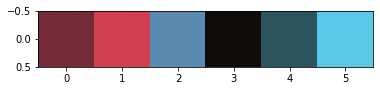

In [26]:
# Get standard deviations of each color
r_std, g_std, b_std = batman_df[['red', 'green', 'blue']].std()

for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    # Convert each standardized value to scaled value
    colors.append((
        scaled_r * r_std / 255,
        scaled_g * g_std / 255,
        scaled_b * b_std / 255
    ))

# Display colors of cluster centers
plt.imshow([colors])
plt.show()

**Notice the three colors resemble the three that are indicative from visual inspection of the image.**

## Document clustering

### TF-IDF of movie plots

<div class=""><p>Let us use the plots of randomly selected movies to perform document clustering on. Before performing clustering on documents, they need to be cleaned of any unwanted noise (such as special characters and stop words) and converted into a sparse matrix through TF-IDF of the documents.</p>
<p>Use the <code>TfidfVectorizer</code> class to perform the TF-IDF of movie plots stored in the list <code>plots</code>. The <code>remove_noise()</code> function is available to use as a <code>tokenizer</code> in the <code>TfidfVectorizer</code> class. The <code>.fit_transform()</code> method fits the data into the <code>TfidfVectorizer</code> objects and then generates the TF-IDF sparse matrix.</p>
<p><strong>Note: It takes a few seconds to run the <code>.fit_transform()</code> method.</strong></p></div>

In [45]:
from nltk.tokenize import word_tokenize
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words2 = stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [46]:
movie = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/06-cluster-analysis-in-python/datasets/movies.csv')
plots = movie['Plot'].values

In [47]:
def remove_noise(text, stop_words = stop_words2):
    tokens = word_tokenize(text)
    cleaned_tokens = []
    for token in tokens:
        token = re.sub('[^A-Za-z0-9]+', '', token)
        if len(token) > 1 and token.lower() not in stop_words:
            # Get lowercase
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

Instructions
<ul>
<li>Import <code>TfidfVectorizer</code> class from <code>sklearn</code>.</li>
<li>Initialize the <code>TfidfVectorizer</code> class with minimum and maximum frequencies of 0.1 and 0.75, and 50 maximum features.</li>
<li>Use the <code>fit_transform()</code> method on the initialized <code>TfidfVectorizer</code> class with the list plots.</li>
</ul>

In [49]:
# Import TfidfVectorizer class from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=0.1, max_df=0.75, max_features=50, tokenizer=remove_noise)

# Use the .fit_transform() method on the list plots
tfidf_matrix = tfidf_vectorizer.fit_transform(plots)

**You have successfully created the sparse matrix. Let us now perform clustering on the matrix.**

### Top terms in movie clusters

<div class=""><p>Now that you have created a sparse matrix, generate cluster centers and print the top three terms in each cluster. Use the <code>.todense()</code> method to convert the sparse matrix, <code>tfidf_matrix</code> to a normal matrix for the <code>kmeans()</code> function to process. Then, use the <code>.get_feature_names()</code> method to get a list of terms in the <code>tfidf_vectorizer</code> object. The <code>zip()</code> function in Python joins two lists.</p>
<p>The <code>tfidf_vectorizer</code> object and sparse matrix, <code>tfidf_matrix</code>, from the previous have been retained in this exercise. <code>kmeans</code> has been imported from SciPy.</p>
<p>With a higher number of data points, the clusters formed would be defined more clearly. However, this requires some computational power, making it difficult to accomplish in an exercise here.</p></div>

Instructions
<ul>
<li>Generate cluster centers through the <code>kmeans()</code> function.</li>
<li>Generate a list of terms from the <code>tfidf_vectorizer</code> object.</li>
<li>Print top 3 terms of each cluster.</li>
</ul>

In [50]:
num_clusters = 2

# Generate cluster centers through the kmeans function
cluster_centers, distortion = kmeans(tfidf_matrix.todense(), num_clusters)

# Generate terms from the tfidf_vectorizer object
terms = tfidf_vectorizer.get_feature_names()

for i in range(num_clusters):
    # Sort the terms and print top 3 terms
    center_terms = dict(zip(terms, list(cluster_centers[i])))
    sorted_terms = sorted(center_terms, key=center_terms.get, reverse=True)
    print(sorted_terms)

['man', 'love', 'wife', 'young', 'film', 'men', 'home', 'one', 'new', 'find', 'two', 'killed', 'however', 'takes', 'time', 'family', 'away', 'later', 'help', 'daughter', 'finds', 'friends', 'tells', 'first', 'friend', 'goes', 'police', 'make', 'also', 'take', 'way', 'house', 'tries', 'life', 'back', 'night', 'decides', 'leaves', 'next', 'go', 'money', 'day', 'leave', 'car', 'father', 'get', 'mother', 'gets', 'nt', 'school']
['father', 'back', 'one', 'get', 'police', 'goes', 'also', 'two', 'money', 'tells', 'tries', 'new', 'nt', 'time', 'take', 'gets', 'life', 'however', 'family', 'go', 'way', 'school', 'day', 'finds', 'car', 'house', 'mother', 'later', 'decides', 'away', 'first', 'killed', 'home', 'night', 'leave', 'find', 'leaves', 'next', 'takes', 'make', 'daughter', 'help', 'friend', 'man', 'friends', 'men', 'film', 'love', 'young', 'wife']


**Notice positive, warm words in the first cluster and words referring to action in the second cluster.**

## Clustering with multiple features

### Clustering with many features

<p>What should you do if you have too many features for clustering?</p>

<pre>
Possible Answers

Visualize all the features

<b>Reduce features using a technique like Factor Analysis</b>

Perform hierarchical clustering

</pre>

**You should explore steps to reduce the number of features.**

### Basic checks on clusters

<div class=""><p>In the FIFA 18 dataset, we have concentrated on defenders in previous exercises. Let us try to focus on attacking attributes of a player. Pace (<code>pac</code>), Dribbling (<code>dri</code>) and Shooting (<code>sho</code>) are features that are present in attack minded players. In this exercise, k-means clustering has already been applied on the data using the scaled values of these three attributes. Try some basic checks on the clusters so formed.</p>
<p>The data is stored in a Pandas data frame, <code>fifa</code>. The scaled column names are present in a list <code>scaled_features</code>. The cluster labels are stored in the <code>cluster_labels</code> column. Recall the <code>.count()</code> and <code>.mean()</code> methods in Pandas help you find the number of observations and mean of observations in a data frame.</p></div>

In [95]:
fifa = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/06-cluster-analysis-in-python/datasets/fifa_250x189.csv')

Instructions
<ul>
<li>Print the size of the clusters by grouping the column <code>cluster_labels</code>.</li>
<li>Print the mean values of the wages of the players in each cluster. <code>eur_wage</code> is the column name that stores the wages of a player in Euros.</li>
</ul>

In [54]:
# Print the size of the clusters
print(fifa.groupby('cluster_labels')['ID'].count())

# Print the mean value of wages in each cluster
print(fifa.groupby('cluster_labels')['eur_wage'].mean())

cluster_labels
0     83
1    107
2     60
Name: ID, dtype: int64
cluster_labels
0    132108.433735
1    130308.411215
2    117583.333333
Name: eur_wage, dtype: float64


**In this example, the cluster sizes are not very different, and there are no significant differences that can be seen in the wages. Further analysis is required to validate these clusters.**

### FIFA 18: what makes a complete player?

<div class=""><p>The overall level of a player in FIFA 18 is defined by six characteristics: pace (<code>pac</code>), shooting (<code>sho</code>), passing (<code>pas</code>), dribbling (<code>dri</code>), defending (<code>def</code>), physical (<code>phy</code>).</p>
<p>Here is a sample card:</p>
<p><img src="https://media.contentapi.ea.com/content/dam/ea/easports/fifa/features/2017/top100-ratings/10-1/fut18-top100-hazard-lg.jpg" width="600" height="300" alt="Eden Hazard Player Card"></p>
<p>In this exercise, you will use all six characteristics to create clusters. The data for this exercise is stored in a Pandas dataframe, <code>fifa</code>. <code>features</code> is the list of these column names and <code>scaled_features</code> is the list of columns which contains their scaled values. The following have been pre-loaded: <code>kmeans</code>, <code>vq</code> from <code>scipy.cluster.vq</code>, <code>matplotlib.pyplot</code> as <code>plt</code>, <code>seaborn</code> as <code>sns</code>.</p>
<p>Before you start the exercise, you may wish to explore <code>scaled_features</code> in the console to check out the list of six scaled columns names.</p></div>

In [100]:
from scipy.cluster.vq import vq
fifa['scaled_sho'] = whiten(fifa['sho'])
fifa['scaled_pas'] = whiten(fifa['pas'])
fifa['scaled_def'] = whiten(fifa['def'])
fifa['scaled_phy'] = whiten(fifa['phy'])
scaled_features = ['scaled_pac', 'scaled_sho', 'scaled_pas', 'scaled_dri', 'scaled_def', 'scaled_phy']

Instructions 1/4
<li>Use the <code>kmeans()</code> algorithm to create 2 clusters using the list of columns, <code>scaled_features</code>.</li>

In [101]:
# Create centroids with kmeans for 2 clusters
cluster_centers,_ = kmeans(fifa[scaled_features], 2)

Instructions 2/4
<li>Assign cluster labels to each row using <code>vq()</code> and print cluster centers of <code>scaled_features</code> using the <code>.mean()</code> method of Pandas.</li>

In [103]:
# Assign cluster labels and print cluster centers
fifa['cluster_labels'], _ = vq(fifa[scaled_features], cluster_centers)
fifa.groupby('cluster_labels')[scaled_features].mean()

,scaled_pac,scaled_sho,scaled_pas,scaled_dri,scaled_def,scaled_phy
cluster_labels,,,,,,
0,7.762181,5.610629,8.620873,8.968266,2.262328,8.009867
1,6.617743,3.885153,7.353643,7.148098,3.862353,9.009407


Instructions 3/4
<li>Plot a bar chart of scaled attributes of each cluster center using the <code>.plot()</code> method of Pandas.</li>

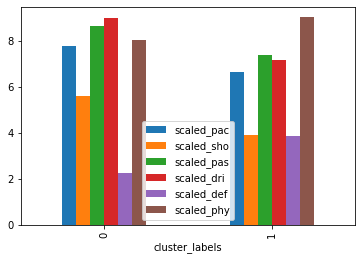

In [104]:
# Plot cluster centers to visualize clusters
fifa.groupby('cluster_labels')[scaled_features].mean().plot(legend=True, kind='bar')
plt.show()

Instructions 4/4
<li>Print the names of first 5 players in each cluster, using the <code>name</code> column.</li>

In [105]:
# Get the name column of first 5 players in each cluster
for cluster in fifa['cluster_labels'].unique():
    print(cluster, fifa[fifa['cluster_labels'] == cluster]['name'].values[:5])

0 ['Cristiano Ronaldo' 'L. Messi' 'Neymar' 'L. Suárez' 'M. Neuer']
1 ['Sergio Ramos' 'G. Chiellini' 'L. Bonucci' 'J. Boateng' 'D. Godín']


**The data was sorted before you performed the clustering. Notice the top players in each cluster are representative of the overall characteristics of the cluster - one of the clusters primarily represents attackers, whereas the other represents defenders. Surprisingly, a top goalkeeper Manuel Neuer is seen in the attackers group, but he is known for going out of the box and participating in open play, which are reflected in his FIFA 18 attributes.**